In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_hdf('train.h5')

In [3]:
df.shape

(1710756, 111)

In [4]:
df.columns

Index(['id', 'timestamp', 'derived_0', 'derived_1', 'derived_2', 'derived_3',
       'derived_4', 'fundamental_0', 'fundamental_1', 'fundamental_2',
       ...
       'technical_36', 'technical_37', 'technical_38', 'technical_39',
       'technical_40', 'technical_41', 'technical_42', 'technical_43',
       'technical_44', 'y'],
      dtype='object', length=111)

In [5]:
df.head()

,id,timestamp,derived_0,derived_1,derived_2,derived_3,derived_4,fundamental_0,fundamental_1,fundamental_2,...,technical_36,technical_37,technical_38,technical_39,technical_40,technical_41,technical_42,technical_43,technical_44,y
0,10,0,0.370326,-0.006316,0.222831,-0.213030,0.729277,-0.335633,0.113292,1.621238,...,0.775208,NaN,NaN,NaN,-0.414776,NaN,NaN,-2.0,NaN,-0.011753
1,11,0,0.014765,-0.038064,-0.017425,0.320652,-0.034134,0.004413,0.114285,-0.210185,...,0.025590,NaN,NaN,NaN,-0.273607,NaN,NaN,-2.0,NaN,-0.001240
2,12,0,-0.010622,-0.050577,3.379575,-0.157525,-0.068550,-0.155937,1.219439,-0.764516,...,0.151881,NaN,NaN,NaN,-0.175710,NaN,NaN,-2.0,NaN,-0.020940
3,25,0,NaN,NaN,NaN,NaN,NaN,0.178495,NaN,-0.007262,...,1.035936,NaN,NaN,NaN,-0.211506,NaN,NaN,-2.0,NaN,-0.015959
4,26,0,0.176693,-0.025284,-0.057680,0.015100,0.180894,0.139445,-0.125687,-0.018707,...,0.630232,NaN,NaN,NaN,-0.001957,NaN,NaN,0.0,NaN,-0.007338


In [10]:
df.timestamp.value_counts()

1811    1086
1812    1086
1700    1086
1701    1086
1702    1086
1703    1086
1704    1086
1705    1086
1706    1086
1698    1086
1699    1086
1707    1085
1708    1085
1709    1085
1801    1084
1710    1084
1799    1084
1810    1084
1802    1084
1809    1084
1808    1084
1807    1084
1806    1084
1803    1084
1805    1084
1804    1084
1800    1084
1713    1083
1711    1083
1712    1083
        ... 
31       744
35       744
40       744
36       744
39       744
41       744
38       744
37       744
30       744
27       744
29       744
49       742
50       741
51       741
57       740
52       740
58       740
56       740
53       740
54       740
59       740
55       740
61       739
60       739
63       738
64       738
65       738
66       738
67       738
62       738
Name: timestamp, dtype: int64

In [6]:
df.isnull().sum()

id                     0
timestamp              0
derived_0          72959
derived_1          81029
derived_2         398651
derived_3         149471
derived_4         406458
fundamental_0      23947
fundamental_1     679070
fundamental_2     368840
fundamental_3     454380
fundamental_5     962020
fundamental_6     701625
fundamental_7      26340
fundamental_8     373166
fundamental_9     565567
fundamental_10    112977
fundamental_11    368840
fundamental_12    110871
fundamental_13    355138
fundamental_14    356084
fundamental_15    354897
fundamental_16    355138
fundamental_17     97222
fundamental_18     15833
fundamental_19     54588
fundamental_20    110871
fundamental_21     54333
fundamental_22    558488
fundamental_23    356723
                   ...  
technical_13        4764
technical_14       14184
technical_16       19981
technical_17        4279
technical_18       20016
technical_19        2320
technical_20        4764
technical_21        2236
technical_22           0


In [26]:
y = df.y

In [17]:
df1 = df[0:10000:10]

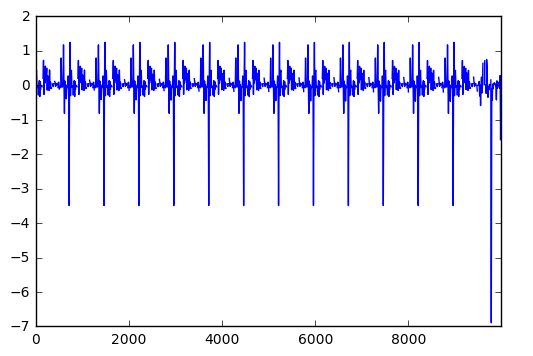

In [18]:
df1.derived_0.plot(kind='line')

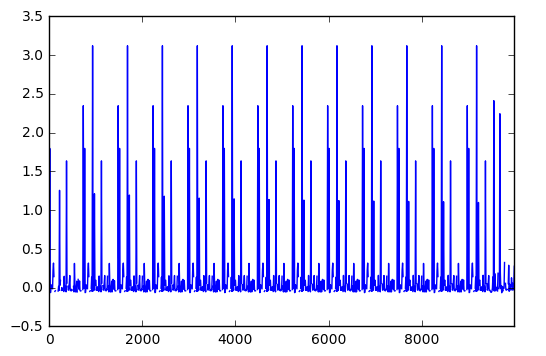

In [19]:
df1.derived_1.plot(kind='line')

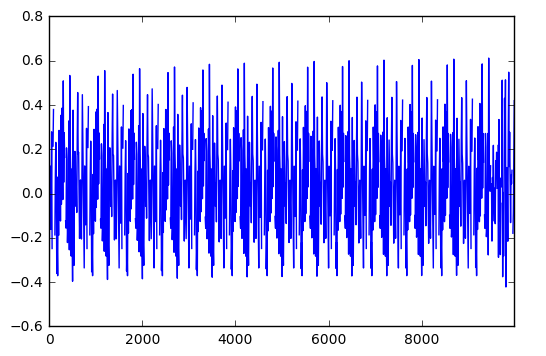

In [20]:
df1.fundamental_0.plot(kind='line')

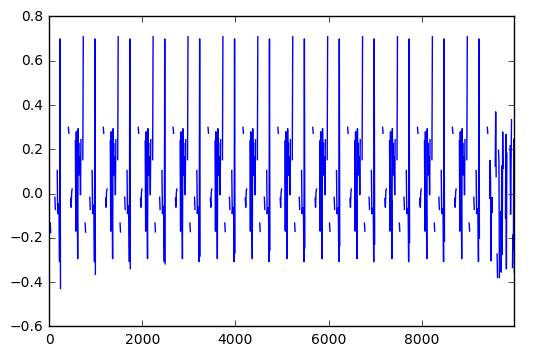

In [21]:
df1.fundamental_1.plot(kind='line')

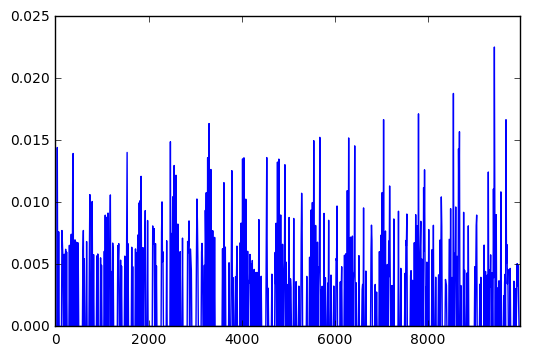

In [22]:
df1.technical_20.plot(kind='line')

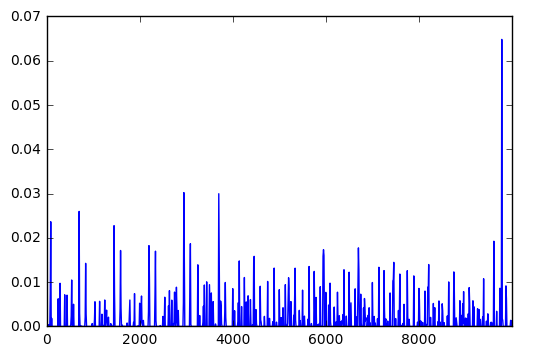

In [23]:
df1.technical_30.plot(kind='line')

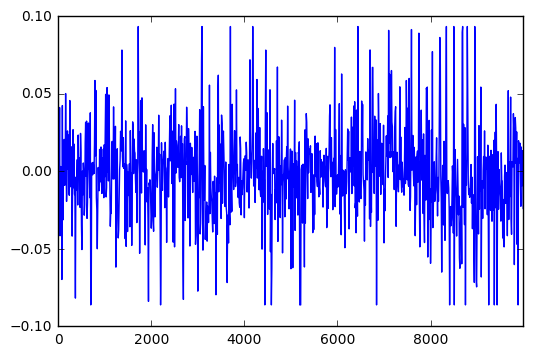

In [24]:
df1.y.plot(kind='line')

In [27]:
df_clean = df.fillna(method='ffill')
df_clean.shape

(1710756, 111)

In [28]:
y.shape

(1710756,)

In [40]:
len(df.timestamp.unique())

1813

In [77]:
gp_y = df.groupby('timestamp')['y']
y_day = gp_y.last()
n_day = y_day.shape[0]

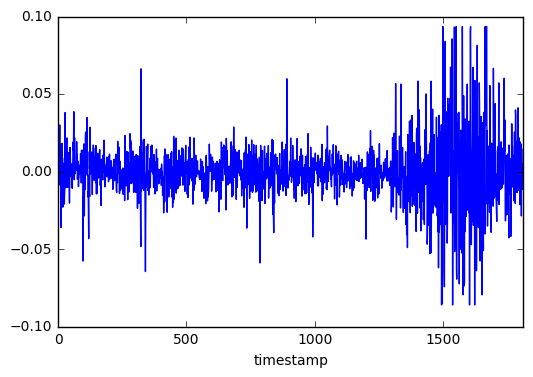

In [78]:
y_day[0:n_day:1].plot()
plt.show()

In [79]:
def diff(s, lag=1):
    return s-s.shift(lag)

s = pd.Series([0,2,4,6,8,10])
print(s)
print(diff(s))

0     0
1     2
2     4
3     6
4     8
5    10
dtype: int64
0    NaN
1    2.0
2    2.0
3    2.0
4    2.0
5    2.0
dtype: float64


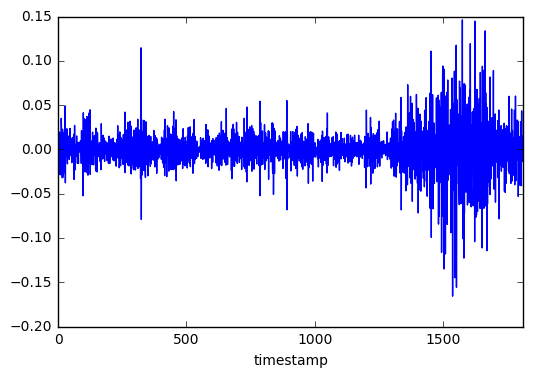

In [80]:
y_day_diff = diff(y_day)

y_day_diff[0:n_day:1].plot()
plt.show()

In [92]:
pd.concat([y_day*1000, y_day_diff*1000], axis=1)[:10]

,y,y
timestamp,,
0,-11.722515,NaN
1,7.955052,19.677568
2,-1.697254,-9.652306
3,-8.659415,-6.962162
4,2.235754,10.895168
5,10.574340,8.338587
6,30.033098,19.458759
7,1.404654,-28.628445
8,-8.726201,-10.130856


In [93]:
from statsmodels.tsa.arima_model import ARIMA

In [105]:
half = int(n_day/2)
y_day1 = y_day[:half]

In [113]:
arma_mod = ARIMA(y_day1.values, order=(0,1,1))
arma_res = arma_mod.fit()
arma_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  905
Model:                 ARIMA(0, 1, 1)   Log Likelihood                2747.037
Method:                       css-mle   S.D. of innovations              0.012
Date:                Sun, 26 Mar 2017   AIC                          -5488.075
Time:                        22:55:50   BIC                          -5473.651
Sample:                             1   HQIC                         -5482.566
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const      -1.605e-06   1.47e-06     -1.091      0.276     -4.49e-06  1.28e-06
ma.L1.D.y     -1.0000      0.003   -294.759      0.000        -1.007    -0.993
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""